# <center> CNN Based Road Traffic Sign Recognition</center>

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Reading the Data

In [3]:
imgs_path = r"C:\Users\mahas\Videos\archive\Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

## Data Visualization

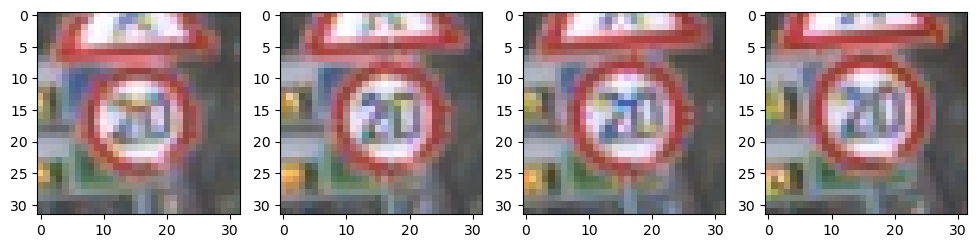

In [4]:
plt.figure(figsize = (12,12))


for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

## Preparing the Dataset

In [5]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

## Splitting the dataset

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

## CNN Model

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))


model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())


model.add(layers.Flatten())


model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

model.add(layers.Dense(1000,activation='relu'))


model.add(layers.Dense(43,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0

## Fitting the model

In [8]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=20,
                 batch_size=64,
                 validation_data=(X_val,Y_val))

Epoch 1/20
491/491 [==============================] - 575s 1s/step - loss: 1.8193 - accuracy: 0.4914 - val_loss: 0.5260 - val_accuracy: 0.8245
Epoch 2/20
491/491 [==============================] - 578s 1s/step - loss: 0.2812 - accuracy: 0.9083 - val_loss: 0.1489 - val_accuracy: 0.9533
Epoch 3/20
491/491 [==============================] - 574s 1s/step - loss: 0.1306 - accuracy: 0.9591 - val_loss: 0.1146 - val_accuracy: 0.9691
Epoch 4/20
491/491 [==============================] - 574s 1s/step - loss: 0.1090 - accuracy: 0.9673 - val_loss: 0.0878 - val_accuracy: 0.9799
Epoch 5/20
491/491 [==============================] - 571s 1s/step - loss: 0.0857 - accuracy: 0.9754 - val_loss: 0.0591 - val_accuracy: 0.9837
Epoch 6/20
491/491 [==============================] - 566s 1s/step - loss: 0.0738 - accuracy: 0.9793 - val_loss: 0.4548 - val_accuracy: 0.9699
Epoch 7/20
491/491 [==============================] - 562s 1s/step - loss: 0.0757 - accuracy: 0.9798 - val_loss: 0.1099 - val_accuracy: 0.9719

## Visualisation of accuracy and loss

Text(0.5, 1.0, 'Loss')

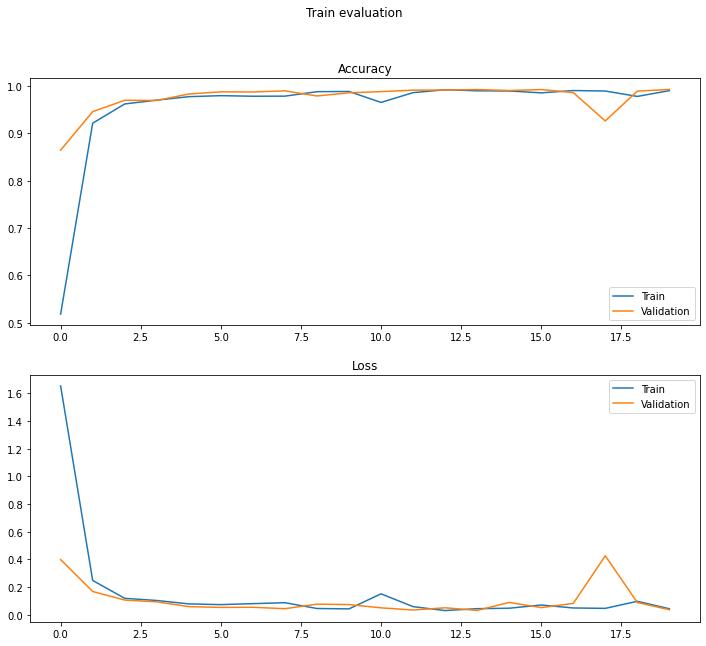

In [8]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

## Evaluation

In [9]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

-Acuracy achieved: 99.52%
-Accuracy by model was: 99.03%
-Accuracy by validation was: 99.29%
